In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
X = df.iloc[:, df.columns != 'medv']
y = df.iloc[:, df.columns == 'medv']
X.shape, y.shape

((506, 13), (506, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.44821258,  2.1311246 , -1.39424588, ..., -0.09890711,
         0.3987419 , -0.70586792],
       [-0.45309711,  0.58775515, -0.93164675, ...,  0.22843818,
         0.44795491, -0.85477137],
       [-0.37260108, -0.5146516 , -0.45299528, ...,  1.16371046,
         0.43417096, -0.6112377 ],
       ...,
       [-0.45206434,  2.5720873 , -1.3139842 , ..., -1.7356336 ,
         0.38291189, -0.94522673],
       [-0.37768863, -0.5146516 ,  1.55354669, ...,  1.25723769,
         0.32799146, -0.24245814],
       [ 1.05538728, -0.5146516 ,  1.00047076, ...,  0.78960155,
         0.44795491,  3.04872546]])

In [12]:
X_test = scaler.transform(X_test)
X_test

array([[-0.44980397, -0.5146516 ,  0.10008065, ...,  1.16371046,
         0.44795491, -1.00506643],
       [-0.4490328 , -0.5146516 , -1.04985031, ..., -0.89388855,
         0.38732706, -0.82693895],
       [-0.41999128, -0.5146516 , -0.22680328, ...,  0.32196541,
         0.44795491,  0.10127224],
       ...,
       [-0.41745432, -0.5146516 , -0.73610011, ..., -0.51977964,
         0.23914959, -1.24442524],
       [-0.44381854,  1.2491992 , -0.70545474, ..., -0.42625241,
         0.36557427, -0.94800997],
       [ 0.13443669, -0.5146516 ,  1.00047076, ...,  0.78960155,
         0.44795491,  0.4770099 ]])

In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 23ms/step - loss: 539.0493 - val_loss: 307.8124
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 463.2745 - val_loss: 240.1808
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 372.5349 - val_loss: 164.3222
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 266.6234 - val_loss: 94.7944
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 161.5447 - val_loss: 52.7110
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 87.1281 - val_loss: 44.2879
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 57.7745 - val_loss: 43.7977
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 45.7624 - val_loss: 35.5011
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 36.3481 - val_loss: 28.3423
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - loss: 30.60

11/11 [==============================] - 0s 15ms/step - loss: 8.7182 - val_loss: 7.0746
Epoch 82/100
11/11 [==============================] - 0s 12ms/step - loss: 8.7132 - val_loss: 5.8668
Epoch 83/100
11/11 [==============================] - 0s 12ms/step - loss: 8.5933 - val_loss: 5.6490
Epoch 84/100
11/11 [==============================] - 0s 9ms/step - loss: 8.6923 - val_loss: 5.5897
Epoch 85/100
11/11 [==============================] - 0s 13ms/step - loss: 8.4250 - val_loss: 5.8908
Epoch 86/100
11/11 [==============================] - 0s 10ms/step - loss: 8.3899 - val_loss: 6.4402
Epoch 87/100
11/11 [==============================] - 0s 11ms/step - loss: 8.2282 - val_loss: 5.3615
Epoch 88/100
11/11 [==============================] - 0s 9ms/step - loss: 8.5437 - val_loss: 5.3765
Epoch 89/100
11/11 [==============================] - 0s 11ms/step - loss: 8.2724 - val_loss: 6.1794
Epoch 90/100
11/11 [==============================] - 0s 11ms/step - loss: 8.1580 - val_loss: 5.5033
Epoch

In [24]:
y_pred = model.predict(X_test)
y_pred.shape

6/6 [==============================] - 0s 2ms/step


(167, 1)

In [25]:
d = pd.DataFrame({'y_test': y_test.iloc[:,0], 'y_pred': y_pred[:,0]})
d

,y_test,y_pred
503,23.9,29.918776
178,29.9,30.347757
494,24.5,20.409887
222,27.5,28.876822
28,18.4,16.671440
...,...,...
411,17.2,13.204086
196,33.3,39.612217
228,46.7,43.511753
276,33.2,34.186138


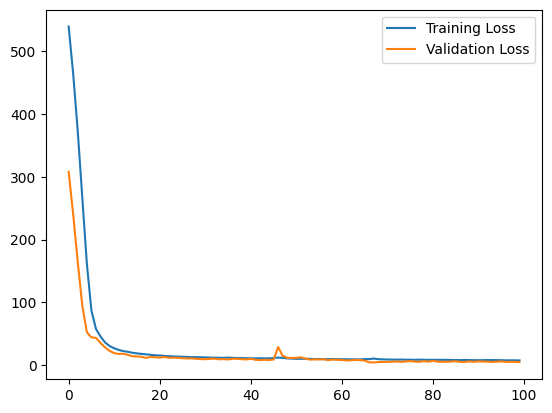

In [26]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

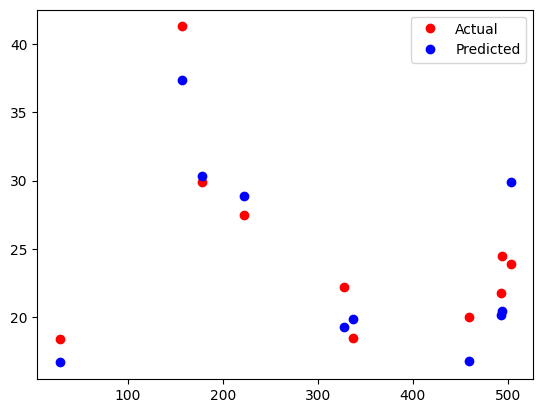

In [27]:
plt.plot(d['y_test'].head(10), 'ro', label='Actual')
plt.plot(d['y_pred'].head(10), 'bo',label='Predicted')
plt.legend()
plt.show()

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse, '\n', mae)

14.036972757097349 
 2.4815226029493136
